<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Formalities

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"f7363c0fb7a444e5f636f321f1cf547c"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Mar  8 04:18 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!pwd
!kaggle datasets list

/content
ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
mkoklu42/acoustic-extinguisher-fire-dataset                      Acoustic Extinguisher Fire Dataset                 620KB  2022-02-09 17:59:52            234  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17             58  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            176  
mkoklu42/rice-image-dataset                                      Rice Image Dataset                                 222MB  2022-02-07 14:32:24            238  
mkoklu42/pumpkin-seeds-dataset 

In [7]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 44.8MB/s]


In [8]:
!unzip videogamesales.zip

Archive:  videogamesales.zip
  inflating: vgsales.csv             


# Quantitative Data Analysis - Video Game Sales 


In [9]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Reading the CSV file
datafile = '/content/vgsales.csv'
df = pd.read_csv(datafile)

## Data Preparation and Cleaning
- Understand the data (Columns and Rows)
- Check for duplicates and fix if found any
- Check for NA or Null values and skip them


In [11]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df.duplicated().sum()
# No duplicated rows found

0

In [15]:
df.isna().sum()
# found 271 NA values in year and 58 in publisher, I think this is okay. We can ignore them for now.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [17]:
# Seperate df for new york sales
df_ny = df[['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']]
# Seperate df for europe sales
df_eu = df[['Name', 'Platform', 'Genre', 'Publisher', 'EU_Sales']]
# Seperate df for japan sales
df_jp = df[['Name', 'Platform', 'Genre', 'Publisher', 'JP_Sales']]

## Data Analysis and visualization
- Analyze from df
- Analyze from New York df
- Analyze from Europe df
- Analyze from Japan df

In [18]:
sns.set_style('whitegrid')

In [19]:
df_genre_number_games

NameError: ignored

In [ ]:
df_genre_number_games = df.groupby(['Genre'], as_index = False)['Global_Sales'].count()
df_genre_number_games

x_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simultaion', 'Sports', 'startegy'] 
plt.figure(figsize = (12,6));
plt.title('Number of games in each genre',
          fontweight = 'bold', 
          size = 15);
plt.xlabel('Genres',
           fontweight = 'bold',
           size = 12);
plt.ylabel('Number of games',
           fontweight = 'bold',
           size = 12);
plt.bar(x = (x_labels),
        height = df_genre_number_games.Global_Sales);
# Number of games in each genre.

In [ ]:
df_genre_number_games

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


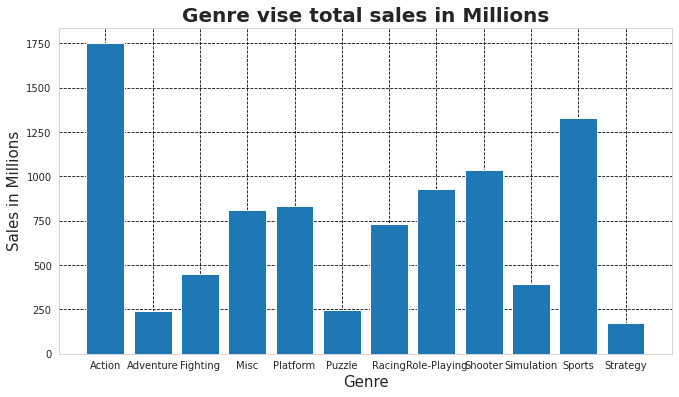

In [20]:
# Which Genre is sold the most
df_genre = df.groupby('Genre', as_index = False)['Global_Sales'].sum()
df_genre
plt.figure(figsize= (11,6));
plt.grid(color = 'black', linestyle= '--')
plt.title('Genre vise total sales in Millions', fontname="Times New Roman", size=20,fontweight="bold");
plt.xlabel('Genre', size = 15);
plt.ylabel('Sales in Millions', size = 15);
plt.bar(x= df_genre.Genre, height = df_genre.Global_Sales);

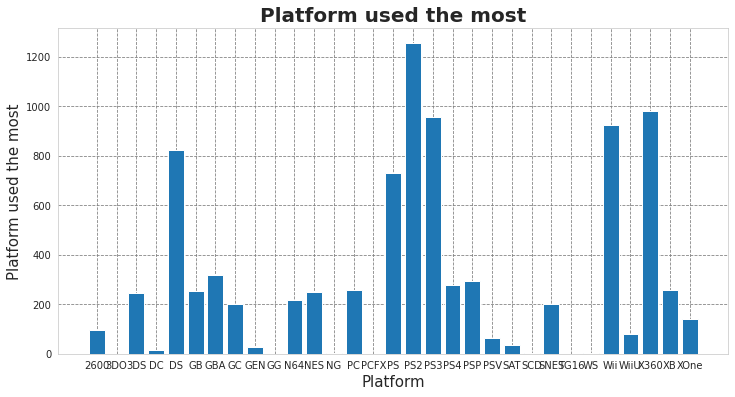

In [21]:
# Which platform is used the most
df_platform = df.groupby('Platform', as_index = False)['Global_Sales'].sum()
df_platform
plt.figure(figsize= (12,6))
plt.grid(color = 'grey', linestyle= '--')
plt.title('Platform used the most', fontname="Times New Roman", size=20,fontweight="bold");
plt.xlabel('Platform', size = 15);
plt.ylabel('Platform used the most', size = 15);
plt.bar(x= df_platform.Platform, height = df_platform.Global_Sales);

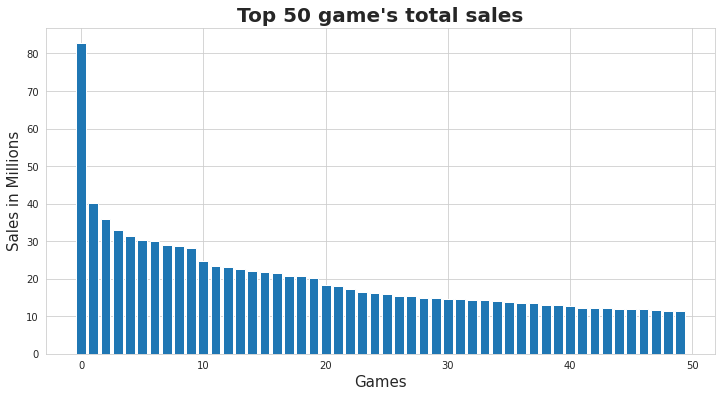

In [22]:
# Top 50 Game Sales
df_games = df[['Name', 'Global_Sales']]
df_games = df_games.head(50)

plt.figure(figsize= (12,6));
df_games_label = np.arange(len(df_games.Name))
plt.title("Top 50 game's total sales", fontname="Times New Roman", size=20,fontweight="bold");
plt.ylabel('Sales in Millions', size = 15);
plt.xlabel('Games', size = 15);
plt.bar(x = df_games_label, height = df_games.Global_Sales);

In [23]:
genre_games = df.groupby(['Genre','Name'], as_index = False)['Global_Sales'].sum()
genre_games
def games(genre):
  genre = genre_games[genre_games['Genre']== genre].sort_values(by= 'Global_Sales', ascending = False).head(50)
  print(genre)
# This function gives out top 50 games during the yers which have seen maximum sales.

In [24]:
games('Action')

       Genre                                         Name  Global_Sales
641   Action                           Grand Theft Auto V         55.92
644   Action                Grand Theft Auto: San Andreas         23.86
640   Action                          Grand Theft Auto IV         22.47
645   Action                  Grand Theft Auto: Vice City         16.19
482   Action                               FIFA Soccer 13         16.16
894   Action            LEGO Star Wars: The Complete Saga         15.75
879   Action                   LEGO Batman: The Videogame         13.67
81    Action              Assassin's Creed IV: Black Flag         13.16
639   Action                         Grand Theft Auto III         13.11
79    Action                         Assassin's Creed III         13.10
1268  Action                          Red Dead Redemption         12.94
885   Action  LEGO Indiana Jones: The Original Adventures         12.05
1202  Action         Pokemon HeartGold/Pokemon SoulSilver       

In [25]:
games('Adventure')

          Genre                                               Name  \
1995  Adventure                                   Assassin's Creed   
2772  Adventure                 Super Mario Land 2: 6 Golden Coins   
2411  Adventure                                         L.A. Noire   
2963  Adventure                    Zelda II: The Adventure of Link   
2647  Adventure                         Rugrats: Search For Reptar   
2088  Adventure                  Club Penguin: Elite Penguin Force   
2301  Adventure                                         Heavy Rain   
2508  Adventure                                               Myst   
2486  Adventure                              Minecraft: Story Mode   
2634  Adventure                          Riven: The Sequel to Myst   
2215  Adventure           Frogger's Adventures: Temple of the Frog   
2844  Adventure                       The Walking Dead: Season One   
2562  Adventure                      Onimusha 2: Samurai's Destiny   
2828  Adventure     

In [26]:
games('Fighting')

         Genre                                  Name  Global_Sales
3433  Fighting               Super Smash Bros. Brawl         13.04
3435  Fighting   Super Smash Bros. for Wii U and 3DS         12.47
3268  Fighting                         Mortal Kombat          8.40
3538  Fighting             WWE SmackDown vs Raw 2008          7.41
3419  Fighting                     Street Fighter IV          7.27
3455  Fighting                              Tekken 3          7.16
3434  Fighting               Super Smash Bros. Melee          7.07
3418  Fighting  Street Fighter II: The World Warrior          6.30
3454  Fighting                              Tekken 2          5.74
3432  Fighting                     Super Smash Bros.          5.55
3140  Fighting                   Fight Night Round 3          5.55
3541  Fighting            WWE SmackDown vs. Raw 2010          5.21
3540  Fighting            WWE SmackDown vs. Raw 2009          4.88
3556  Fighting                          WWF War Zone          

In [27]:
games('Misc')

     Genre                                               Name  Global_Sales
4845  Misc                                           Wii Play         29.02
4266  Misc                                          Minecraft         23.73
4164  Misc                                 Kinect Adventures!         21.82
3679  Misc       Brain Age: Train Your Brain in Minutes a Day         20.22
3978  Misc                   Guitar Hero III: Legends of Rock         16.40
4122  Misc                                       Just Dance 3         12.92
3988  Misc                            Guitar Hero: World Tour         10.08
4117  Misc                                       Just Dance 2          9.52
4235  Misc                                     Mario Party DS          9.02
4123  Misc                                       Just Dance 4          8.93
4843  Misc                                          Wii Party          8.49
4232  Misc                                      Mario Party 8          8.42
4296  Misc  

In [28]:
games('Platform')

         Genre                                             Name  Global_Sales
5401  Platform                                Super Mario Bros.         45.31
5231  Platform                            New Super Mario Bros.         30.01
5234  Platform                        New Super Mario Bros. Wii         28.62
5411  Platform                                Super Mario World         26.07
5403  Platform                              Super Mario Bros. 3         22.48
5397  Platform                                   Super Mario 64         22.31
5407  Platform                                 Super Mario Land         18.14
5039  Platform                              Donkey Kong Country         13.53
5405  Platform                               Super Mario Galaxy         11.52
5395  Platform                              Super Mario 3D Land         10.79
5399  Platform                            Super Mario All-Stars         10.55
5232  Platform                          New Super Mario Bros. 2 

In [29]:
games('Puzzle')

       Genre                                         Name  Global_Sales
5923  Puzzle                                       Tetris         35.84
5557  Puzzle  Brain Age 2: More Training in Minutes a Day         15.30
5623  Puzzle                                    Dr. Mario         10.19
5797  Puzzle                                      Pac-Man          9.03
5822  Puzzle     Professor Layton and the Curious Village          5.26
5936  Puzzle                                Tetris Worlds          4.01
5823  Puzzle      Professor Layton and the Diabolical Box          4.00
5826  Puzzle      Professor Layton and the Unwound Future          3.36
5798  Puzzle                           Pac-Man Collection          2.94
5977  Puzzle                      WarioWare: Smooth Moves          2.92
5990  Puzzle                               Yoshi's Cookie          2.80
5824  Puzzle        Professor Layton and the Last Specter          2.79
5749  Puzzle     Mario vs. Donkey Kong: Mini-Land Mayhem!       

In [30]:
games('Racing')

       Genre                             Name  Global_Sales
6360  Racing                   Mario Kart Wii         35.82
6359  Racing                    Mario Kart DS         23.42
6256  Racing           Gran Turismo 3: A-Spec         14.98
6477  Racing      Need for Speed: Most Wanted         14.08
6357  Racing                     Mario Kart 7         12.21
6257  Racing                   Gran Turismo 4         11.66
6473  Racing     Need for Speed Underground 2         10.97
6253  Racing                     Gran Turismo         10.95
6259  Racing                   Gran Turismo 5         10.77
6472  Racing       Need for Speed Underground         10.46
6356  Racing                    Mario Kart 64          9.87
6255  Racing                   Gran Turismo 2          9.49
6644  Racing                 Super Mario Kart          8.76
6481  Racing        Need for Speed: ProStreet          8.58
6684  Racing          The Simpsons: Hit & Run          7.04
6358  Racing                     Mario K

In [31]:
games('Role-Playing')

             Genre                                               Name  \
7581  Role-Playing                           Pokemon Red/Pokemon Blue   
7572  Role-Playing                        Pokemon Gold/Pokemon Silver   
7843  Role-Playing                        The Elder Scrolls V: Skyrim   
7570  Role-Playing                      Pokemon Diamond/Pokemon Pearl   
7582  Role-Playing                      Pokemon Ruby/Pokemon Sapphire   
7568  Role-Playing                        Pokemon Black/Pokemon White   
7592  Role-Playing            Pokémon Yellow: Special Pikachu Edition   
7584  Role-Playing                                Pokemon X/Pokemon Y   
7111  Role-Playing                                          Fallout 4   
7577  Role-Playing          Pokemon Omega Ruby/Pokemon Alpha Sapphire   
6951  Role-Playing                                         Diablo III   
7571  Role-Playing                  Pokemon FireRed/Pokemon LeafGreen   
7108  Role-Playing                                 

In [32]:
games('Shooter')

        Genre                              Name  Global_Sales
8098  Shooter           Call of Duty: Black Ops         31.03
8104  Shooter    Call of Duty: Modern Warfare 3         30.83
8100  Shooter        Call of Duty: Black Ops II         29.72
8222  Shooter                         Duck Hunt         28.31
8102  Shooter              Call of Duty: Ghosts         27.38
8099  Shooter         Call of Duty: Black Ops 3         25.32
8103  Shooter    Call of Duty: Modern Warfare 2         25.09
8097  Shooter    Call of Duty: Advanced Warfare         21.90
8096  Shooter    Call of Duty 4: Modern Warfare         18.25
8042  Shooter                     Battlefield 3         17.36
8111  Shooter        Call of Duty: World at War         15.87
8043  Shooter                     Battlefield 4         14.03
8194  Shooter                           Destiny         12.61
8313  Shooter                            Halo 3         12.14
8639  Shooter      Star Wars Battlefront (2015)         11.70
8320  Sh

In [33]:
games('Simulation')

           Genre                                       Name  Global_Sales
9246  Simulation                                 Nintendogs         24.76
9435  Simulation                                 The Sims 3         15.45
8846  Simulation                Animal Crossing: Wild World         12.27
8845  Simulation                  Animal Crossing: New Leaf          9.09
8923  Simulation                               Cooking Mama          5.72
9236  Simulation                                     MySims          5.40
9475  Simulation                             Tomodachi Life          5.15
9197  Simulation                 Microsoft Flight Simulator          5.12
9452  Simulation                      The Sims: Bustin' Out          4.98
8843  Simulation                 Animal Crossing: City Folk          4.68
9421  Simulation                                 The Sims 2          4.42
9363  Simulation                               SimCity 2000          4.24
9432  Simulation                      

In [34]:
games('Sports')

        Genre                                       Name  Global_Sales
10827  Sports                                 Wii Sports         82.74
10829  Sports                          Wii Sports Resort         33.00
10824  Sports                                    Wii Fit         22.72
10825  Sports                               Wii Fit Plus         22.00
9823   Sports                                    FIFA 15         19.02
9822   Sports                                    FIFA 14         17.14
9824   Sports                                    FIFA 16         16.44
10173  Sports         Mario & Sonic at the Olympic Games         13.20
9821   Sports                                    FIFA 12         13.15
9838   Sports                             FIFA Soccer 11         12.56
9837   Sports                             FIFA Soccer 10         10.74
10137  Sports                              Madden NFL 07         10.03
10909  Sports                              Zumba Fitness          9.79
9834  

In [35]:
games('Strategy')

          Genre                                           Name  Global_Sales
11218  Strategy                                Pokemon Stadium          5.45
11445  Strategy                                   Warzone 2100          5.01
11327  Strategy                 StarCraft II: Wings of Liberty          4.83
11431  Strategy                 Warcraft II: Tides of Darkness          4.21
11220  Strategy                      Pokémon Trading Card Game          3.70
10990  Strategy                   Command & Conquer: Red Alert          3.26
11219  Strategy                              Pokémon Stadium 2          2.73
11311  Strategy                                 Sim Theme Park          2.71
11088  Strategy                                      Halo Wars          2.63
11399  Strategy                                 Theme Hospital          2.49
11306  Strategy            Sid Meier's Civilization Revolution          2.08
11434  Strategy                        Warcraft: Orcs & Humans          2.08

In [36]:
df_platform = df.groupby(['Platform', 'Name'], as_index = False)['Global_Sales'].sum()
df_platform
def games(platform):
  platform = df_platform[df_platform['Platform'] == platform].sort_values(by= 'Global_Sales', ascending = False).head(10)
  print(platform[['Name', 'Global_Sales']])
# This function gives out top 10 most selling games of each platform

In [37]:
games('PS4')

                                 Name  Global_Sales
10473       Call of Duty: Black Ops 3         14.24
10548              Grand Theft Auto V         11.98
10524                         FIFA 16          8.49
10694    Star Wars Battlefront (2015)          7.67
10472  Call of Duty: Advanced Warfare          7.60
10527                       Fallout 4          6.96
10523                         FIFA 15          6.59
10485                         Destiny          5.65
10525                         FIFA 17          4.77
10719                  The Last of Us          4.55


In [42]:
df['NA %'] = (df['NA_Sales']/df['Global_Sales'])* 100
df['EU %'] = (df['EU_Sales']/df['Global_Sales'])* 100
df['JP %'] = (df['JP_Sales']/df['Global_Sales'])* 100
df['Other %'] = (df['Other_Sales']/df['Global_Sales'])* 100

In [43]:
df = df.reindex(columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'NA %', 'EU_Sales', 'EU %', 'JP_Sales', 'JP %', 'Other_Sales', 'Other %', 'Global_Sales'])

In [44]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA %,EU_Sales,EU %,JP_Sales,JP %,Other_Sales,Other %,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,50.145033,29.02,35.073725,3.77,4.556442,8.46,10.224801,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,72.266402,3.58,8.896620,6.81,16.923459,0.77,1.913519,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,44.249023,12.88,35.957566,3.79,10.580681,3.31,9.240648,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,47.727273,11.01,33.363636,3.28,9.939394,2.96,8.969697,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,35.926044,8.89,28.339178,10.22,32.578897,1.00,3.187759,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,100.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,100.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.000000,0.01,100.000000,0.00,0.000000,0.00,0.000000,0.01
